In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy import fftpack, ndimage
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
import numpy as np
from ipywidgets import FloatSlider

In [11]:
def circMask(rows,cols,radius):
    # Setup a rectangular array of given rows and colums
    rectArray = np.zeros([rows,cols])
    # Create a meshgrid of index values
    x = np.linspace(0,cols-1,cols)
    y = np.linspace(0,rows-1,rows)
    x = np.copy(x)-(cols-1)/2;
    y = np.copy(y)-(rows-1)/2;
    [X,Y] = np.meshgrid(x,y)
    # Take the sqrt of the square of each X and Y value
    quadSum = np.sqrt(np.square(X)+np.square(Y))
    # Check if it is less than the radius
    booleanArray = quadSum < radius;
    # convert boolean array to image
    intArray = booleanArray.astype(int);
    return(intArray)
def Annulus(rows,cols,outerRadius,innerRadius):
    outerCircle = np.copy(circMask(rows,cols,outerRadius))
    innerCircle = np.copy(circMask(rows,cols,innerRadius))
    intArray = np.subtract(1,np.subtract(outerCircle.astype(float),innerCircle.astype(float)))
    return(intArray)
def CroppedFFT(fshift,magSpectrum,rows,cols,outerRadius,innerRadius):
    croppingArray = Annulus(rows,cols,outerRadius,innerRadius)
    croppedFFT2 = np.multiply(magSpectrum,croppingArray.astype(float))
    plt.figure(figsize=(15,15))
    plt.imshow(croppedFFT2, cmap = 'gray')
    fshift_cropped = np.multiply(fshift,croppingArray.astype(float))
    f_ishift = np.fft.ifftshift(fshift_cropped)
    img_back = np.fft.ifft2(fshift_cropped)
    img_back = np.abs(img_back)
    plt.figure(figsize=(50,20))
    plt.subplot(131),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image',fontsize=50), plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
    plt.title('FFT Back',fontsize=50), plt.xticks([]), plt.yticks([])
    plt.show()
    return croppedFFT2

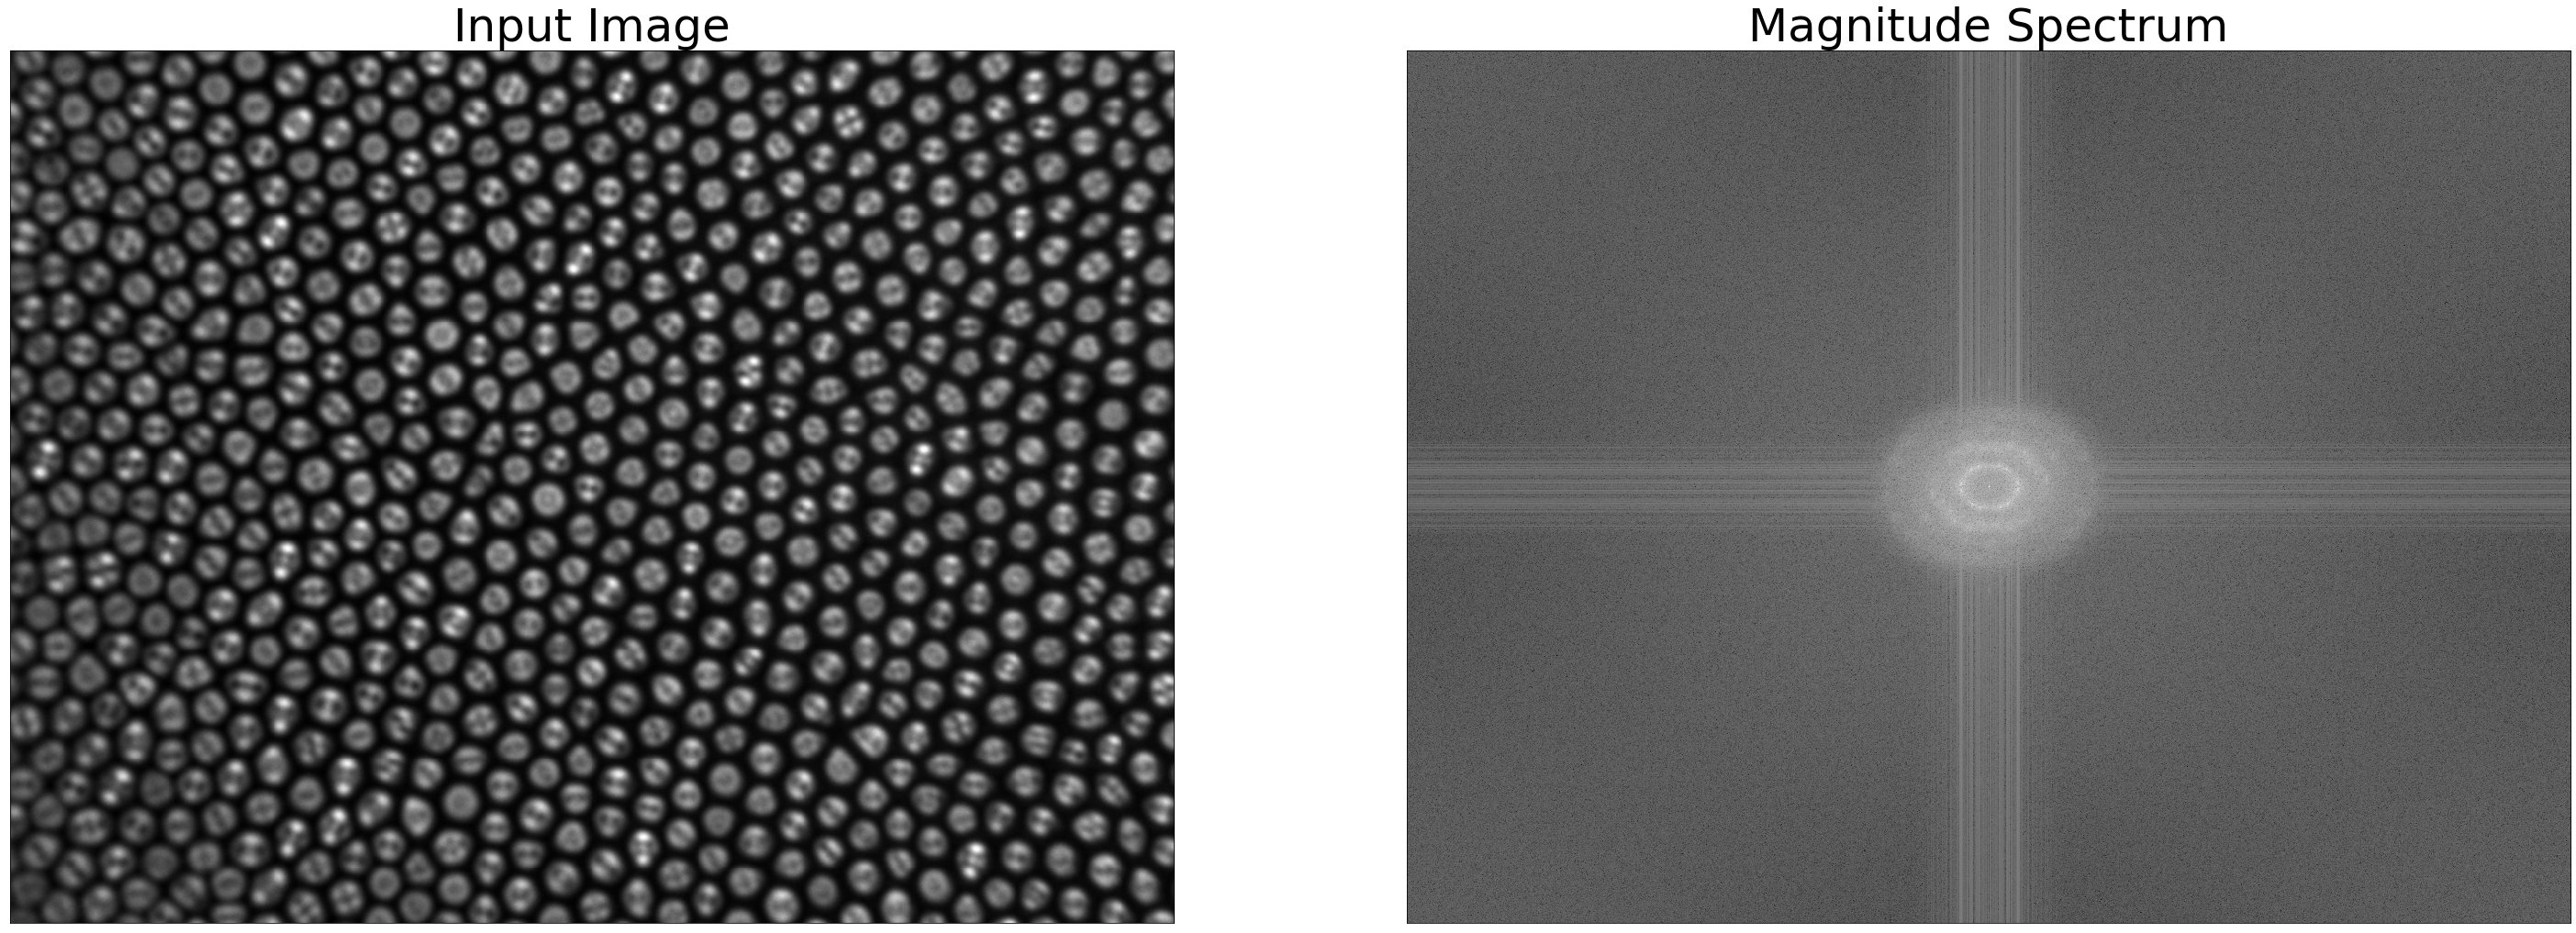

In [8]:
img = img=mpimg.imread('ref2.png')
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
''
plt.figure(figsize=(50,20))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image',fontsize=50), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum',fontsize=50), plt.xticks([]), plt.yticks([])
plt.show()

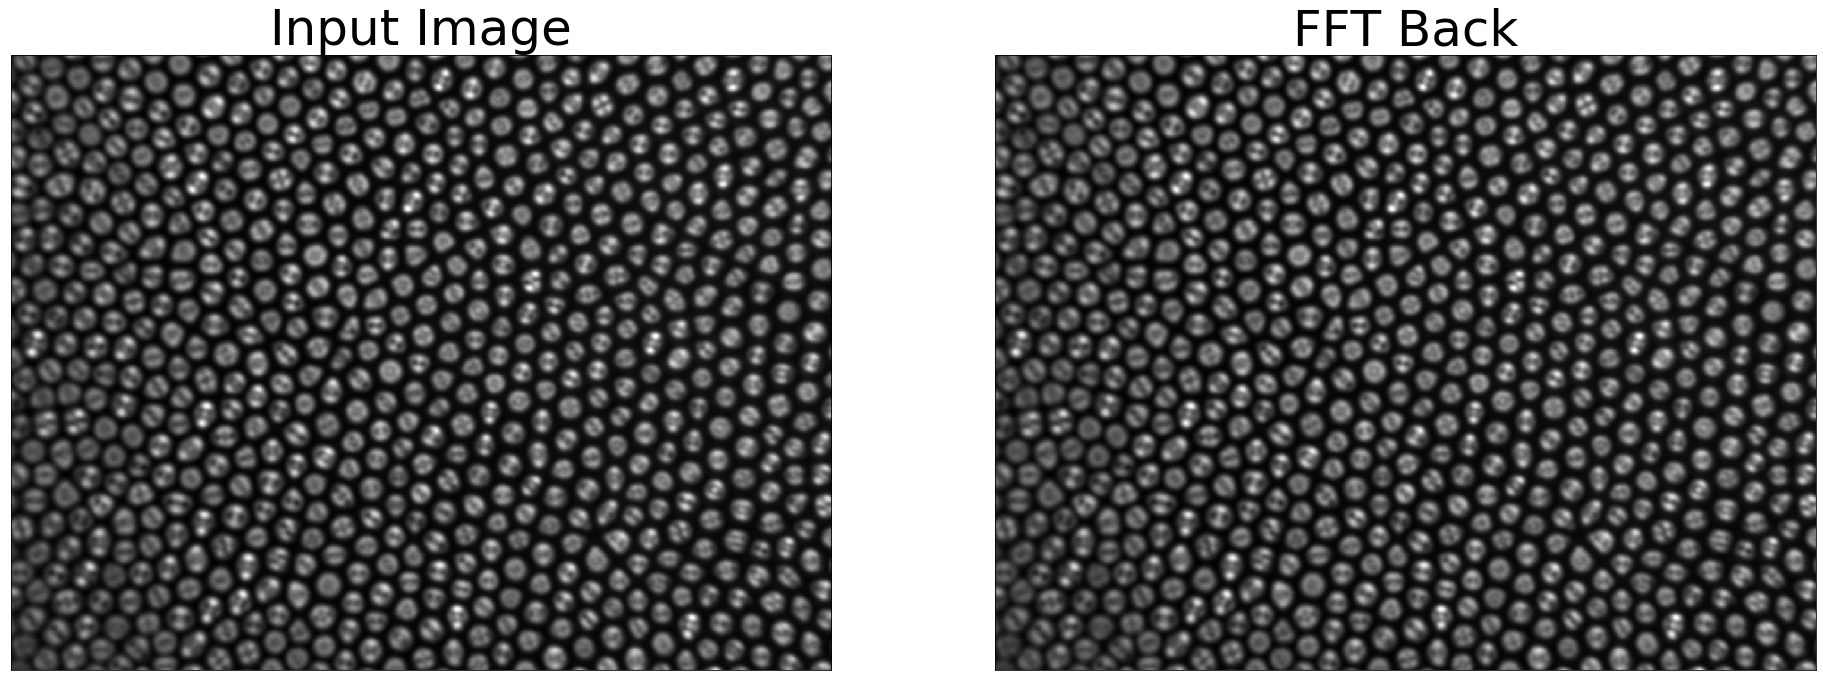

In [9]:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(50,20))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image',fontsize=50), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('FFT Back',fontsize=50), plt.xticks([]), plt.yticks([])

plt.show()

In [13]:
rows,cols = np.shape(magnitude_spectrum)
interact_manual(CroppedFFT,fshift=fixed(fshift),magSpectrum = fixed(magnitude_spectrum), rows = fixed(rows), cols = fixed(cols), outerRadius = widgets.FloatText(min=1, max=rows/4, step=1, value=10), innerRadius = widgets.FloatText(min=0, max=rows/4, step=1, value=5))


interactive(children=(FloatText(value=10.0, description='outerRadius', step=1.0), FloatText(value=5.0, descrip…

<function __main__.CroppedFFT(fshift, magSpectrum, rows, cols, outerRadius, innerRadius)>